In [1]:
import pandas as pd

inv = pd.read_csv('fct_invoice.csv')
cust = pd.read_json('dim_customer.json')

In [ ]:
# EASY

In [ ]:
# QUESTION ONE: How many unique customers are in the dataset?

In [2]:
n1 = cust['id'].nunique()

print(n1)

5191


In [ ]:
# QUESTION TWO PART ONE: What are the different categories of products available?
# QUESTION TWO PART TWO: How many unique categories are there?

In [3]:
n21 = inv['category'].unique()
n22 = inv['category'].nunique()

print(n21)
print(n22)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


In [ ]:
# QUESTION THREE PART ONE: Which payment method is the most popular?
# QUESTION THREE PART TWO: How many times was it used?

In [4]:
pm_count = inv.groupby('payment_method').size()

n32 = max(list(pm_count))
n31 = pm_count[pm_count==n32].index[0]

print(n31)
print(n32)

Cash
44447


In [ ]:
# MEDIUM

In [ ]:
# QUESTION ONE: What are the three most popular categories, by total sales?

In [5]:
inv['sales'] = inv['quantity']*inv['price']
group_cat = inv.groupby('category')['sales'].sum()

n1 = []
for i in range(3):
    n1.append(group_cat.sort_values(ascending=False)[0:3].index[i])

print(n1)

['Clothing', 'Shoes', 'Technology']


In [6]:
inv['sales'] = inv['quantity']*inv['price']
group_cat = inv.groupby('category')['sales'].sum()

n2 = group_cat.sort_values(ascending=False)[0:3]

print('Total sales for the top 3 most popular category')
print(n2)

Total sales for the top 3 most popular category
category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64


In [ ]:
# QUESTION TWO: What are the total sales attributed to customers over the age of 45?

In [7]:
inv['sales'] = inv['quantity']*inv['price']

joint = inv.merge(cust, how='outer', left_on='customer_id', right_on='id')

n2 = joint.loc[joint['age'] >45, 'sales'].sum()

print(n2)

82039768.15


In [ ]:
# QUESTION THREE: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this)

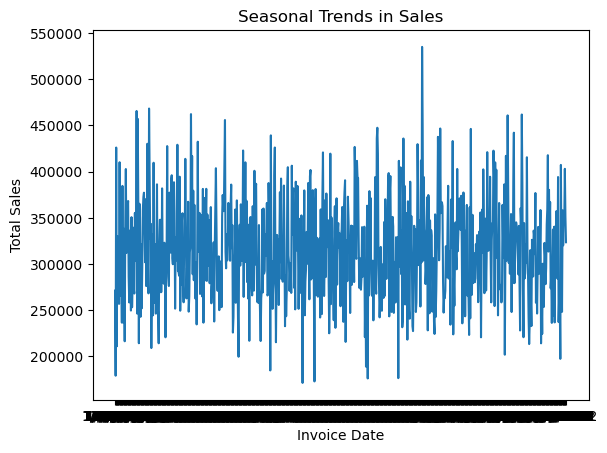

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

inv = pd.read_csv('fct_invoice.csv')
cust = pd.read_json('dim_customer.json')
inv['sales'] = inv['quantity']*inv['price']

joint = inv.merge(cust, how='outer', left_on='customer_id', right_on='id')

grouped_data = joint.groupby('invoice_date')['sales'].sum()

plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales')
plt.title('Seasonal Trends in Sales')
plt.show()

In [ ]:
# HARD

In [ ]:
# QUESTION ONE: Create a pivot table showing the breakdown of sales across these dimensions in this order: category, decade age range (e.g., 10-19, 20-29, and so forth)

In [9]:
import numpy as np

bins = range(0,101,10)

joint['age_group'] = pd.cut(x = joint['age'], bins = bins, include_lowest = False)

age_group = joint.groupby('age_group')['age']

final_table = joint.groupby('category').first().reset_index()
final_table = pd.pivot_table(joint, values='sales', index='category', columns='age_group', aggfunc=np.sum)

print(final_table)

age_group        (0, 10]    (10, 20]     (20, 30]     (30, 40]     (40, 50]  \
category                                                                      
Books                0.0    19891.95     80128.35     84446.10     82946.25   
Clothing             0.0  3029007.52  10079987.28  11516170.16  10933114.72   
Cosmetics            0.0   178009.48    594733.82    722406.22    656740.32   
Food & Beverage      0.0    20433.61     74271.23     89187.19     85034.57   
Shoes                0.0  1367187.26   6152942.84   7178633.37   6775319.13   
Souvenir             0.0    20128.68     53570.91     63705.63     65007.66   
Technology           0.0  1772400.00   5049450.00   6231750.00   5840100.00   
Toys                 0.0    98273.28    380011.52    426460.16    378864.64   

age_group           (50, 60]     (60, 70]    (70, 80]    (80, 90]  (90, 100]  
category                                                                      
Books               79537.50     76234.80    56251.